In [253]:
import sys
import imp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import HTML
sys.path.append('..')
import pyava
imp.reload(pyava.ei_perc)
imp.reload(pyava.graph_generators)
#imp.reload(pyava.avalanche)
from pyava.ei_perc import ei_perc, iterate_start_node_ei_perc, get_active_nodes, get_explored_edges, get_activated_nodes_before_t
from pyava.graph_generators import er_graph_dale, assign_cell_type
from pyava.visualize import show_movie
from pyava.avalanche import activation_movie, activation_cluster

In [308]:
nb_nodes = 1000
d = 5
p = d/nb_nodes
p_exc = 0.45
graph = er_graph_dale(nb_nodes, p, p_exc)

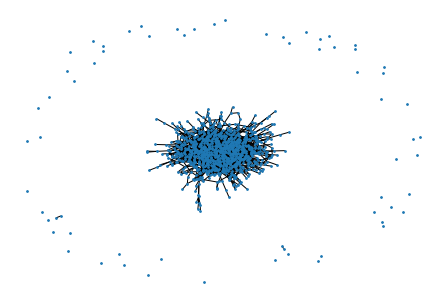

In [265]:
#pos = nx.spring_layout(graph)
nx.draw(graph, node_size=3)

699


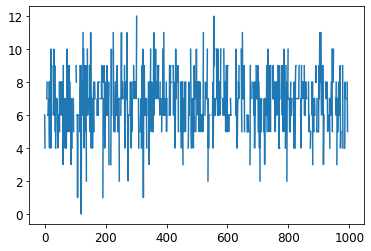

In [108]:
start_nodes = [120]
graph_act = ei_perc(graph, start_nodes)
state_dict= nx.get_node_attributes(graph_act, 'state')
xx = [k for k,v in state_dict.items() if v == 1]
time_dict = nx.get_node_attributes(graph_act, 'active_time')
plt.plot(time_dict.values())
#print(xx)
print(len(xx))

In [111]:
sys.getsizeof(graph_act)

48

In [163]:
p_exc = 0.7
graph = assign_cell_type(graph, p_exc)
graph_act_list = iterate_start_node_ei_perc(graph)

100%|██████████| 1000/1000 [00:27<00:00, 35.98it/s]


[1, 959, 966, 961, 1, 955, 964, 961, 1, 960]


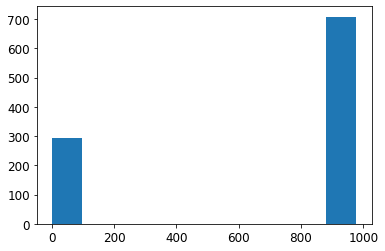

In [179]:
cluster_size_list = [len(get_active_nodes(g)) for g in graph_act_list]
plt.hist(cluster_size_list)
print(cluster_size_list[:10])

In [168]:
import pydot
from networkx.drawing.nx_pydot import graphviz_layout


In [ ]:
p_exc = 0.6
graph = assign_cell_type(graph, p_exc)

In [ ]:
graph_act = ei_perc(graph, [2])

t = 6
nodes = get_activated_nodes_before_t(graph_act, t)
sub_graph = graph_act.subgraph(nodes)

pos = graphviz_layout(sub_graph, prog="twopi")

ncolor_dict = {1:"blue", -1:"red"}
ncolor_list = [ncolor_dict[d["ntype"]] for u,d in sub_graph.nodes(data=True)]
ecolor_dict = {1:'black', -1:'red', 0:'brown'}
ecolor_list = [ecolor_dict[d['etype']] for u,v,d in sub_graph.edges(data=True)]

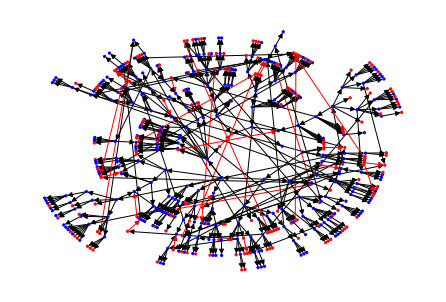

In [325]:
nx.draw(sub_graph, pos, node_color=ncolor_list, node_size=5, edge_color=ecolor_list)